**Utilise Libraries/Data Setup**
* Import all necessary libraries (pandas, numpy, matplotlib, seaborn, scikit-learn)
* Load the customer dataset and display the first few rows
* Show basic information and statistics about the dataset

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [27]:
custData = pd.read_csv('sample_data/customer_data.csv')
custData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    float64
 4   Purchase Frequency      200 non-null    float64
 5   Avg Purchase Value      200 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 9.5 KB


In [25]:
custData.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Avg Purchase Value
0,1,56,84,71.905329,5.9,106.071893
1,2,69,86,38.482533,6.0,62.755253
2,3,46,41,38.967487,7.5,29.958887
3,4,32,23,10.002036,1.7,67.007220
4,5,60,76,56.350309,2.9,72.704110


In [9]:
custData.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Avg Purchase Value
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,43.42500,67.145000,50.869302,5.335500,43.092021
std,57.879185,14.94191,31.249587,22.563855,2.687808,29.326249
min,1.000000,18.00000,15.000000,1.000000,0.600000,10.000000
25%,50.750000,31.00000,41.000000,32.366332,3.000000,17.651673
50%,100.500000,43.50000,66.500000,52.352457,5.450000,36.086311
75%,150.250000,56.00000,95.250000,67.224241,7.600000,59.641832
max,200.000000,69.00000,119.000000,100.000000,10.000000,137.621150


**Data Visualisation and Enhancement**

* Generate at least three EDA (Exploratory Data Analysis) visualisations:
  1. Create scatter plots to visualise relationships between
variables
  2. Generate a correlation heatmap to understand feature relationships
  3. Create distribution plots for all variables
* Check for missing values and outliers:
  1. Identify and handle missing data appropriately
  2. Detect outliers using box plots and decide whether to remove them
* Scale/normalise features for clustering:
  1. Apply standardisation or min-max scaling
  2. Display the transformed data summary

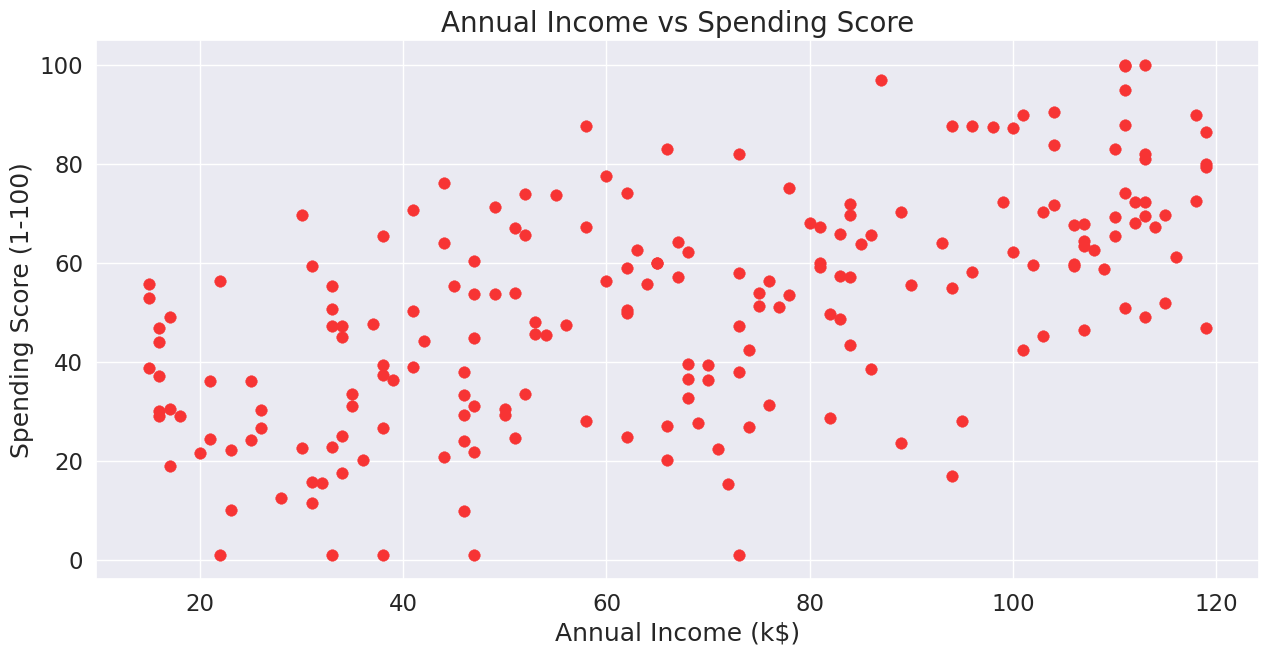

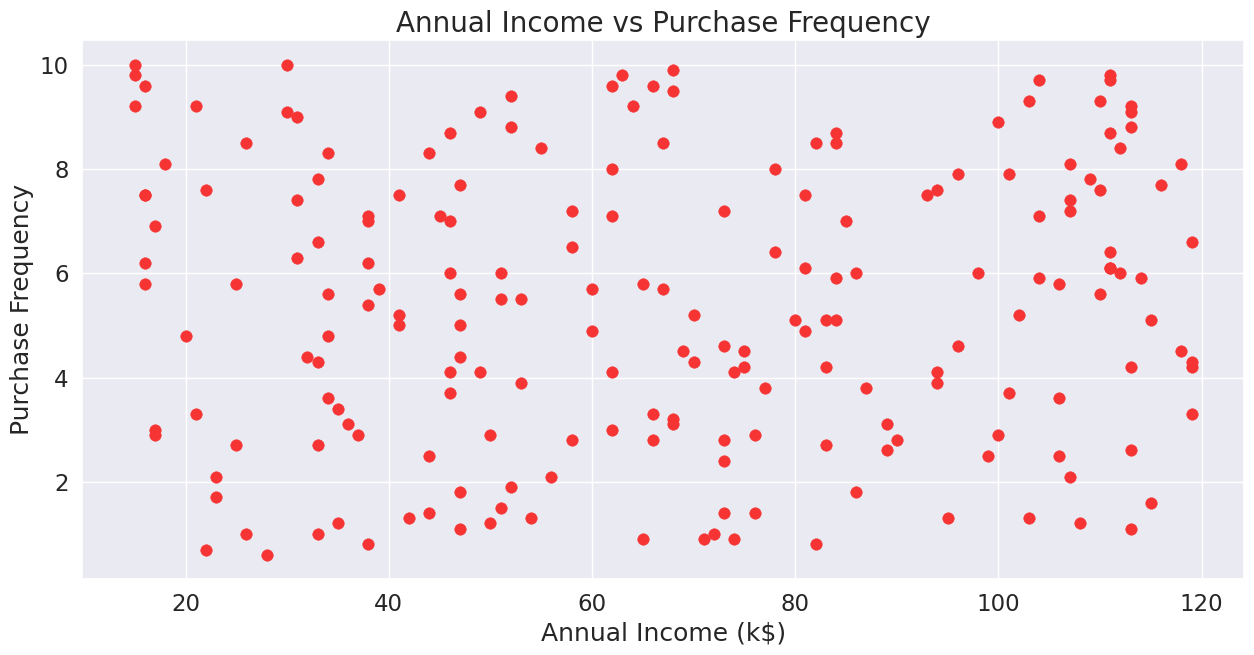

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=custData['Annual Income (k$)'],y=custData['Spending Score (1-100)'], s=70, color='#f73434', edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Spending Score (1-100)')
ax.set_xlabel('Annual Income (k$)')
plt.title('Annual Income vs Spending Score', fontsize = 20)
plt.show()

fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=custData['Annual Income (k$)'],y=custData['Purchase Frequency'], s=70, color='#f73434', edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Purchase Frequency')
ax.set_xlabel('Annual Income (k$)')
plt.title('Annual Income vs Purchase Frequency', fontsize = 20)
plt.show()

In [111]:
numeric_df = custData.select_dtypes(include=[np.number])

# Compute the correlation matrix for numerical variables
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)
numeric_df = numeric_df.drop('CustomerID', axis=1).drop('Age', axis=1).drop('Purchase Frequency', axis=1) #Dropping both CustomerID and Age as they seem to have no correlation



Correlation Matrix:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000  0.036668            0.012145   
Age                       0.036668  1.000000           -0.045936   
Annual Income (k$)        0.012145 -0.045936            1.000000   
Spending Score (1-100)    0.072500  0.020348            0.598042   
Purchase Frequency       -0.035033  0.004427            0.037133   
Avg Purchase Value        0.116998  0.024484            0.367822   

                        Spending Score (1-100)  Purchase Frequency  \
CustomerID                            0.072500           -0.035033   
Age                                   0.020348            0.004427   
Annual Income (k$)                    0.598042            0.037133   
Spending Score (1-100)                1.000000            0.420496   
Purchase Frequency                    0.420496            1.000000   
Avg Purchase Value                    0.184898           -0.025963   

           

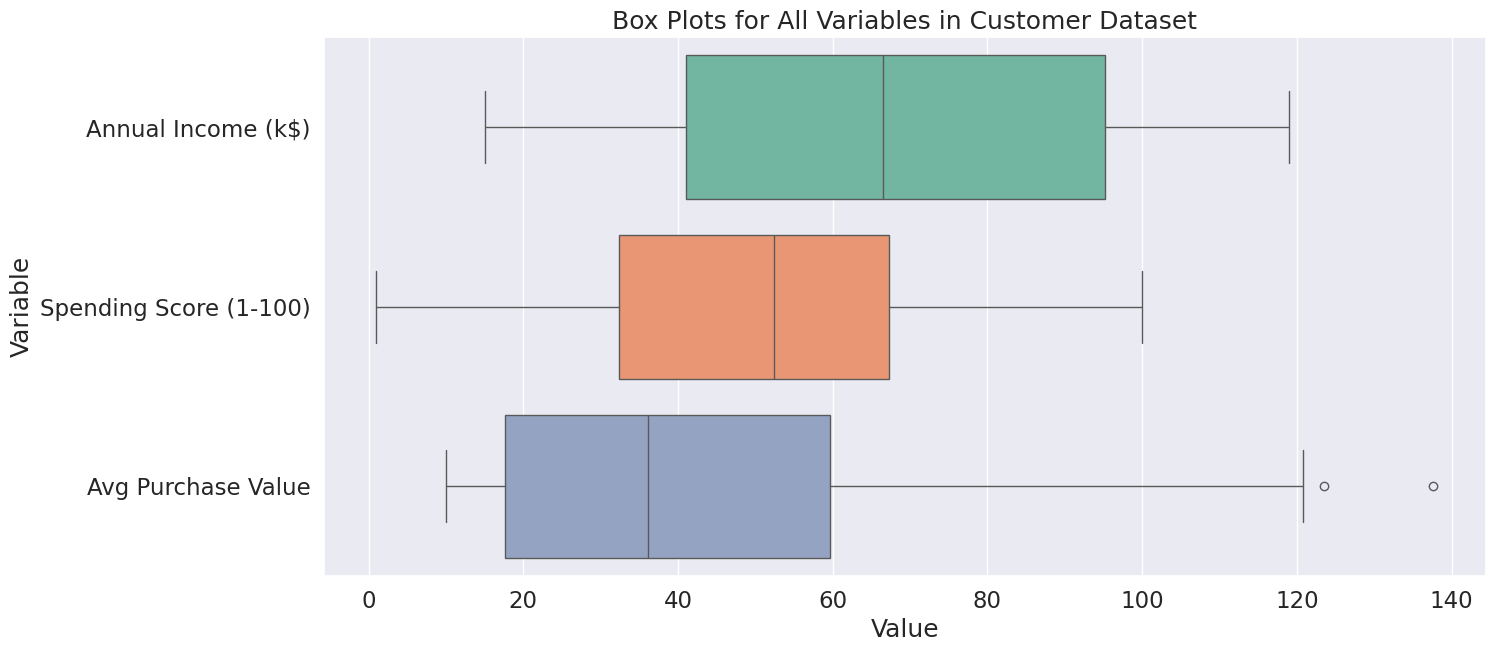

In [112]:
# Create boxplots for each numerical variable in a single graph
plt.figure(figsize=(15, 7)) # Adjust figure size as needed
sns.boxplot(data=numeric_df, orient="h", palette="Set2") # 'orient="h"' makes them horizontal

# Add title and labels
plt.title("Box Plots for All Variables in Customer Dataset")
plt.xlabel("Value")
plt.ylabel("Variable")

# Show the plot
plt.show()

In [113]:
custData.isna().sum()
#no null values

scaler = MinMaxScaler() # StandardScaler()
scaledData = scaler.fit_transform(numeric_df)
print(scaledData)

[[6.63461538e-01 7.16215441e-01 7.52789742e-01]
 [6.82692308e-01 3.78611447e-01 4.13373905e-01]
 [2.50000000e-01 3.83509973e-01 1.56391689e-01]
 [7.69230769e-02 9.09296534e-02 4.46691004e-01]
 [5.86538462e-01 5.59094030e-01 4.91330080e-01]
 [3.46153846e-01 6.66369382e-01 7.45343856e-02]
 [9.23076923e-01 9.96712724e-01 7.19071798e-02]
 [4.80769231e-01 5.95821973e-01 0.00000000e+00]
 [4.13461538e-01 2.72241670e-01 5.69657137e-02]
 [2.21153846e-01 3.66141037e-01 0.00000000e+00]
 [7.50000000e-01 6.36978731e-01 8.67655080e-01]
 [5.57692308e-01 3.72179579e-01 4.14419684e-02]
 [2.98076923e-01 2.85487206e-01 0.00000000e+00]
 [9.13461538e-01 6.50130601e-01 0.00000000e+00]
 [8.36538462e-01 5.90895021e-01 2.68062779e-01]
 [1.00000000e+00 8.62406518e-01 2.02661958e-01]
 [4.90384615e-01 2.63438855e-01 5.68337480e-01]
 [5.86538462e-01 3.05635237e-01 2.60570327e-01]
 [5.48076923e-01 1.43928275e-01 1.75002962e-01]
 [4.90384615e-01 8.28608505e-01 1.61100392e-01]
 [1.05769231e-01 2.58105612e-01 2.835364

**Determine the Optimal Number of Clusters**

* Implement the Elbow Method:
  1. Calculate inertia for different values of k (1-10)
  2. Plot the elbow curve and identify the optimal k value
* Apply Silhouette Analysis:
  1. Calculate silhouette scores for different values of k
  2. Visualise silhouette plots and determine the best k value
* Justify your final choice of k with clear reasoning

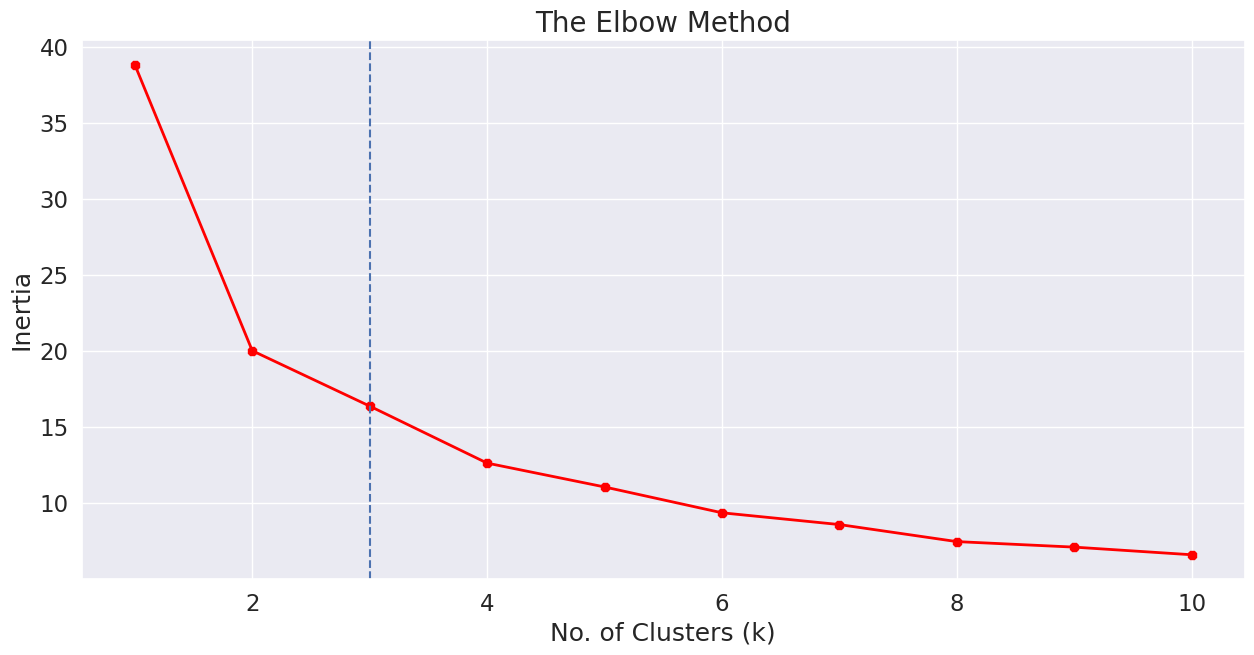

In [114]:
#Elbow method
from sklearn.cluster import KMeans
inert=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(scaledData)
    inert.append(km.inertia_)
#np.array(inert)
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),inert, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('Inertia')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

2 0.40560735944648507
3 0.3511067534899205
4 0.3090759464052157
5 0.29434353089508114
6 0.2779775192738129
7 0.25679431611325504
8 0.2687927045556205
9 0.27595008067371524
10 0.2729670658659024


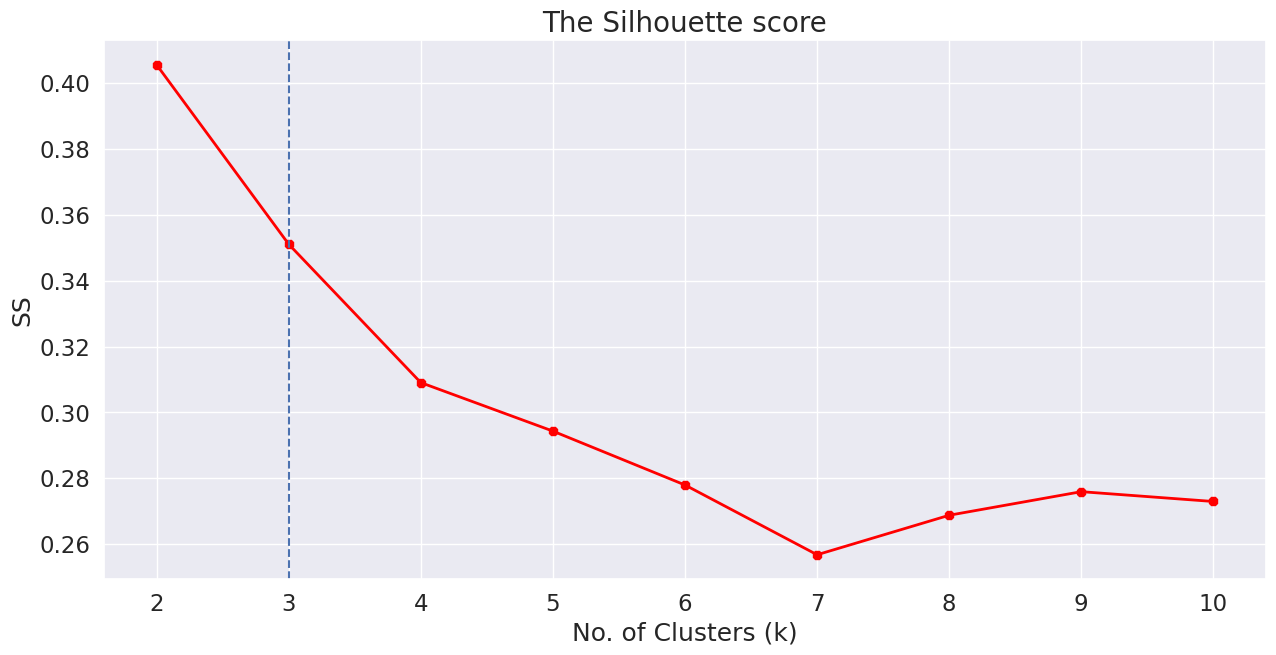

In [115]:
#Finding optimal K using silhouette_score
from sklearn.metrics import silhouette_score
ss=[]
for i in range(2,11):
    km = KMeans(n_clusters=i)
    labels = km.fit_predict(scaledData)
    score = silhouette_score(scaledData, labels)
    print(i, score)
    ss.append(score)

fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(2,11),ss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('SS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Silhouette score', fontsize = 20)
plt.show()

Considering 2 clusters as the elbow method clearly shows the infliction point there. After 2 there is not much change in the inertia. Also ss is high for 2 clusters.

**Implement K-means Clustering**

* Initialise and train the K-Means model with the optimal k value and assign cluster labels to each customer
* Visualise the clusters using:
  1. 2D scatter plots with different feature combinations
  2. 3D scatter plot for three key features
  3. Interpret the characteristics of each cluster

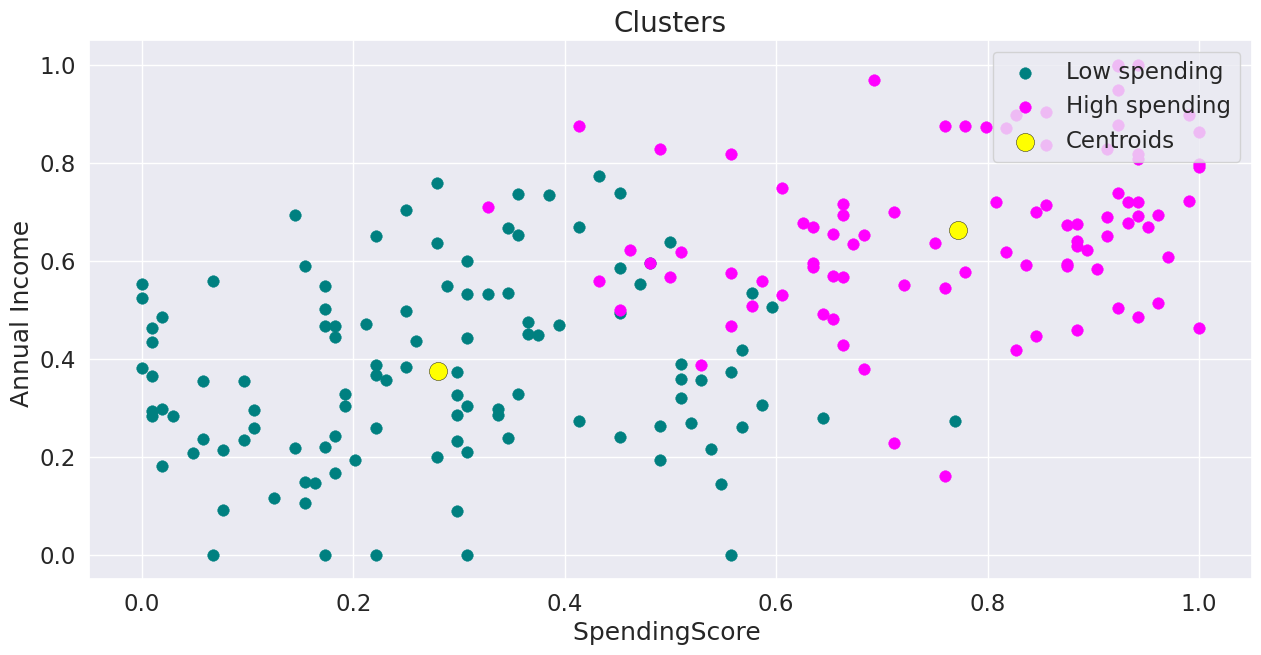

In [123]:
kmeans = KMeans(n_clusters=2, max_iter=40 , algorithm = 'lloyd') # or algorithm='lloyd or elkan')
y_kmeans = kmeans.fit_predict(scaledData)
centers = kmeans.cluster_centers_
clusters= pd.DataFrame({'Annual Income (k$)': scaledData[:, 0],
                        'Spending Score (1-100)': scaledData[:,1],
                        #'Purchase Frequecy': scaledData[:,2],
                        'Avg Purchase Value': scaledData[:,2], 'Cluster_Prediction': y_kmeans})
# sns.pairplot(clusters, hue='Cluster_Prediction', palette='viridis')
# plt.suptitle('Pairplot of 4 Features by Cluster', y=1.02)
# plt.show()

fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending Score (1-100)'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Low spending')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending Score (1-100)'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='High spending')

plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
# plt.xlim(1,10)
# plt.ylim(1,10)
ax.set_ylabel('Annual Income ')
ax.set_xlabel('SpendingScore ')
plt.title('Clusters', fontsize = 20)
plt.show()

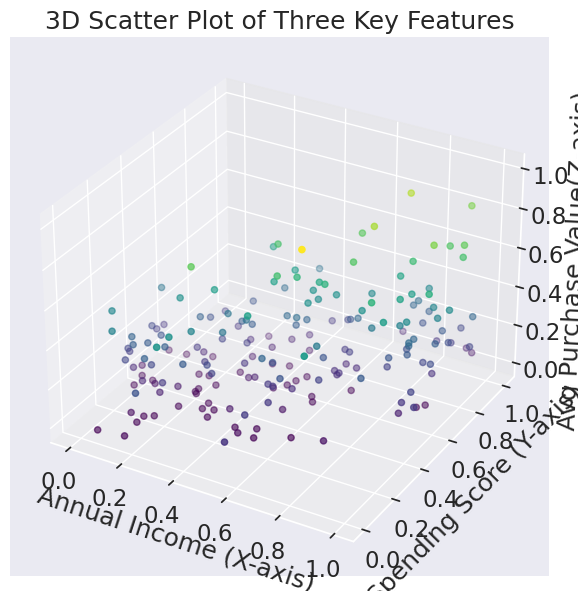

In [127]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d') # or use fig.add_subplot(111, projection='3d')

# 3. Create the 3D scatter plot
ax.scatter(scaledData[:, 0], scaledData[:, 1], scaledData[:, 2], c=scaledData[:, 2], cmap='viridis', marker='o') # 'c' adds a 4th dimension with color

# 4. Set labels for the three key features
ax.set_xlabel('Annual Income (X-axis)')
ax.set_ylabel('Spending Score (Y-axis)')
ax.set_zlabel('Avg Purchase Value(Z-axis)')
ax.set_title('3D Scatter Plot of Three Key Features')

# 5. Display the plot
plt.show()

Interpretation - Higher salary customers have higher spending score and Avg Purchase value.